In [2]:
import os
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage.color import rgb2gray
import sys
sys.path.insert(0, os.path.abspath(".."))
from reliabilitycli.src.utils.transform import get_image_based_on_transformation, bootstrap_transform
from skimage.metrics import structural_similarity as ssim
from sewar.full_ref import vifp
import albumentations as A
from skimage.filters import gaussian

In [3]:
image_path = "/home/user/datasets/ImageNet/val/n01440764/ILSVRC2012_val_00000293.JPEG"
# image_path = "/home/user/datasets/ImageNet/val/n01494475/ILSVRC2012_val_00001676.JPEG"
image_path = "/home/user/datasets/ImageNet/val/n01518878/ILSVRC2012_val_00004983.JPEG"

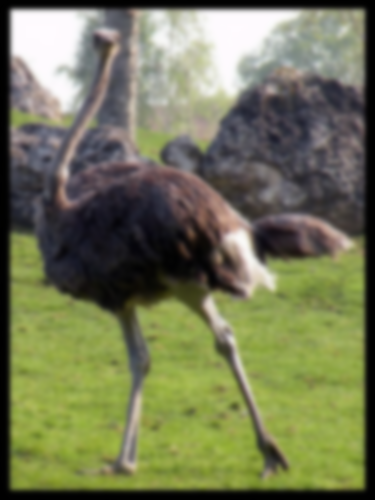

In [6]:
def gaussian_blur(x, i):
#	c = [1, 2, 3, 4, 6][severity - 1]
	c = np.linspace(0.00001,5,1000)
	# print(c)
	x = gaussian(np.array(x) / 255., sigma=c[i], channel_axis=2)
	return np.clip(x, 0, 1) * 255, c[i]

img = Image.open(image_path).convert("RGB")
img_arr = np.asarray(img)
# img2, param_index = bootstrap_transform(img, 'gaussian_noise', 999)
img2, param_index = gaussian_blur(img, 500)
# img2 = img2.astype(np.uint8)
# Image.fromarray(img2)
# img2.max()
# img_arr.max()
# Image.fromarray(img2)
Image.fromarray(img2.astype(np.uint8))

In [21]:
img = Image.open(image_path)
img_arr = np.asarray(img)
transformed_img_arr = bootstrap_transform(img_arr, "gaussian_noise", 999)[0].astype(np.uint8)
vifp(img_arr, transformed_img_arr)
vifp(img_arr, img_arr)

0.99999999999068

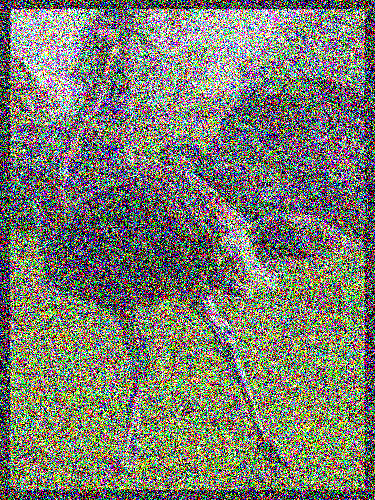

In [18]:
Image.fromarray(bootstrap_transform(img_arr, "gaussian_noise", 999)[0].astype(np.uint8))

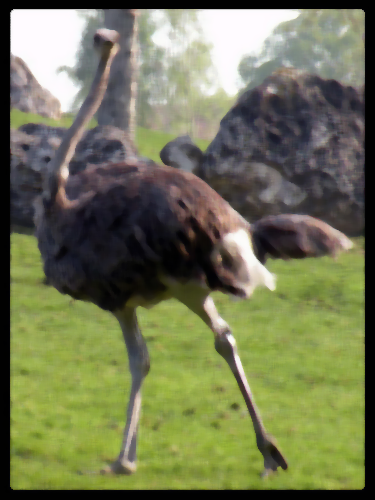

In [64]:
Image.fromarray(A.median_blur(img_arr, 7)).save('median_blur.png')

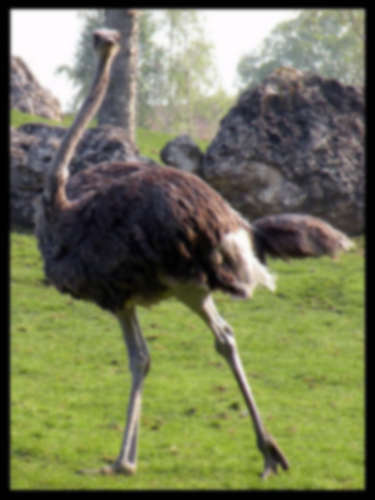

In [59]:
Image.fromarray(A.gaussian_blur(img_arr, 9))

In [56]:
# plt.imshow(transformed_img_arr)
# plt.imshow(A.to_gray(img_arr))
vifp(A.to_gray(img_arr), A.to_gray(transformed_img_arr))



0.26712417085796164

In [36]:
vifp(img_arr, transformed_img_arr)

0.15105883172936152

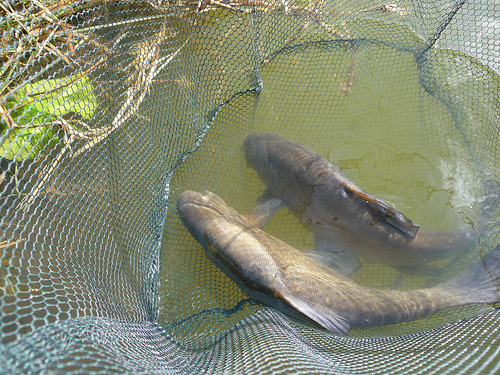

In [27]:
# img = Image.open("../img1.png")
image_path = "/home/user/datasets/ImageNet/val/n01440764/ILSVRC2012_val_00000293.JPEG"
img = Image.open(image_path)
# ImageOps.grayscale(img)
img.convert("RGB")

In [80]:
bootstrap_transform(np.asarray(img), "brightness", 864)[0].astype(int)

array([[[232, 255, 136],
        [243, 255, 149],
        [240, 255, 181],
        ...,
        [246, 255, 246],
        [242, 255, 244],
        [241, 255, 244]],

       [[237, 255, 140],
        [216, 255, 127],
        [227, 255, 105],
        ...,
        [240, 255, 240],
        [238, 255, 239],
        [237, 255, 238]],

       [[247, 255, 232],
        [255, 240, 201],
        [255, 239, 171],
        ...,
        [246, 255, 245],
        [242, 255, 243],
        [242, 255, 243]],

       ...,

       [[170, 248, 255],
        [171, 253, 255],
        [177, 255, 255],
        ...,
        [252, 255, 180],
        [248, 255, 155],
        [241, 255, 151]],

       [[173, 241, 255],
        [177, 251, 255],
        [181, 255, 253],
        ...,
        [247, 255, 153],
        [240, 255, 143],
        [240, 255, 150]],

       [[172, 236, 255],
        [180, 250, 255],
        [180, 255, 250],
        ...,
        [237, 255, 147],
        [235, 255, 153],
        [235, 255, 158]]

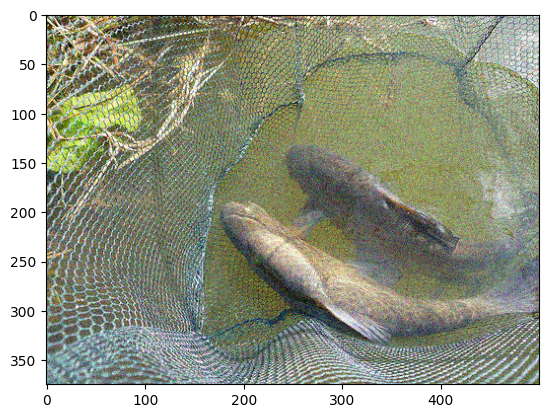

In [107]:
transformed = bootstrap_transform(np.asarray(img), "gaussian_noise", 4)[0].astype(int)
plt.imshow(transformed)

In [108]:
gray_1 = np.asarray(ImageOps.grayscale(img))
gray_2 = rgb2gray(transformed) * 255
# ssim(gray_1, gray_2, data_range=gray_1.max() - gray_2.min())
vifp(gray_1, gray_2)

0.0

In [44]:
rgb2gray(np.array(img)) * 255

array([[153.6175, 173.8925, 131.4881, ..., 202.0078, 194.2982, 185.2982],
       [ 67.6303,  74.566 , 146.7543, ..., 212.5848, 208.0877, 200.0877],
       [ 99.7136,  67.0569, 125.1044, ..., 203.9357, 202.2261, 205.2261],
       ...,
       [150.4509, 144.4471, 141.225 , ..., 106.4803, 106.2622, 108.4084],
       [135.0768, 131.4317, 129.4279, ..., 104.2622, 100.4084, 102.5526],
       [119.496 , 117.7067, 116.2058, ...,  99.3401,  98.3439,  98.4881]])

In [ ]:
img2, param_index = bootstrap_transform(img, self.transformation_type)

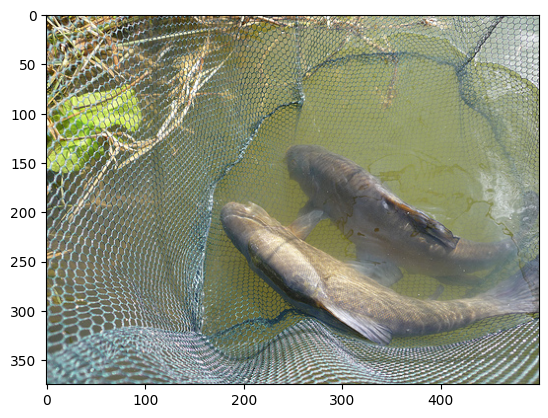

In [30]:
# cv2.imwrite("img3.png", np.asarray(cv2.imread(image_path), dtype=np.float32))
# plt.imshow(np.asarray(cv2.imread(image_path), dtype=np.float32))
# cv2.imread(image_path)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

In [7]:
imgarr = np.array(img)
cv2.imwrite("img3.png", cv2.cvtColor(imgarr, cv2.COLOR_RGB2BGR))
# plt.imshow(imgarr)
# cv2.imshow('image',imgarr)
# cv2.waitKey(0)

True

In [33]:
cv2.imwrite("img3.png", cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY).astype(np.float32))

True

In [18]:
rgb2gray(imgarr).shape
# cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY).shape
imgarr.

(375, 500)

In [21]:
cv2.imwrite("img3.png", rgb2gray(imgarr) * 255)
# cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY).astype(np.float32)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


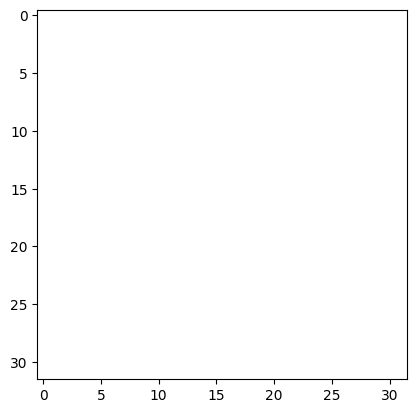

In [28]:
plt.imshow(np.array(img).astype(np.float32))

In [12]:
# cv2.imwrite("debug.png", np.array(img))
cv2.imwrite("debug.png", rgb2gray(np.array(img)))

True

In [15]:
original = data.astronaut()
grayscale = rgb2gray(original)

In [17]:
original.shape

(512, 512, 3)

In [19]:
gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
cv2.imwrite("debug.png", gray)

True

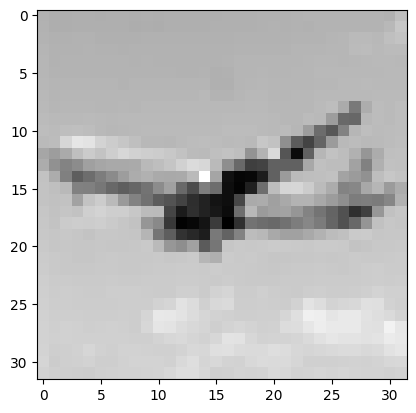

In [24]:
plt.imshow(rgb2gray(np.array(img)), cmap='gray')